<a href="https://colab.research.google.com/github/syed840/CodSoft2/blob/main/CodSoft_Task_2_Movie_predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
full_data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [8]:
full_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
full_data.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
full_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
full_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


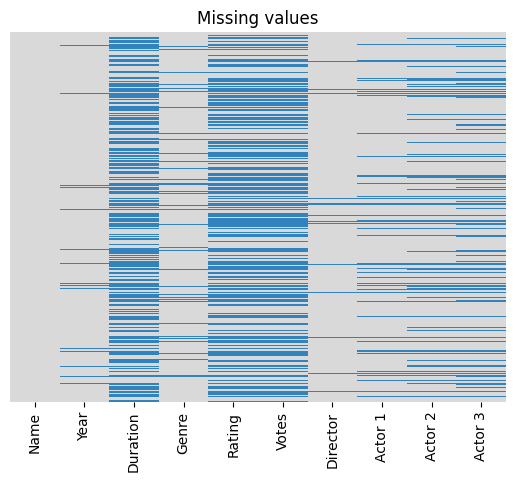

In [19]:
sns.heatmap(full_data.isnull(),yticklabels=False, cbar= False,cmap="tab20c_r")
plt.title("Missing values")
plt.show()

In [15]:
x=full_data.iloc[:,:-1].values
y=full_data.iloc[:,4].values
print(x)

[[' ' nan nan ... 'J.S. Randhawa' 'Manmauji' 'Birbal']
 ['#Gadhvi (He thought he was Gandhi)' '(2019)' '109 min' ...
  'Gaurav Bakshi' 'Rasika Dugal' 'Vivek Ghamande']
 ['#Homecoming' '(2021)' '90 min' ... 'Soumyajit Majumdar' 'Sayani Gupta'
  'Plabita Borthakur']
 ...
 ['Zulmi Raj' '(2005)' nan ... 'Kiran Thej' 'Sangeeta Tiwari' nan]
 ['Zulmi Shikari' '(1988)' nan ... nan nan nan]
 ['Zulm-O-Sitam' '(1998)' '130 min' ... 'K.C. Bokadia' 'Dharmendra'
  'Jaya Prada']]


In [16]:
print(y)

[nan 7.  nan ... nan nan 6.2]


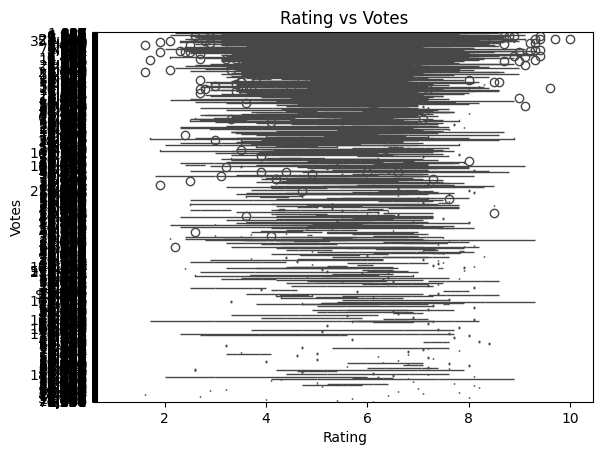

In [21]:
sns.boxplot(x='Rating',y='Votes',data=full_data,palette = "rainbow")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title('Rating vs Votes')
plt.show()

In [22]:
full_data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [23]:
full_data.head(4)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


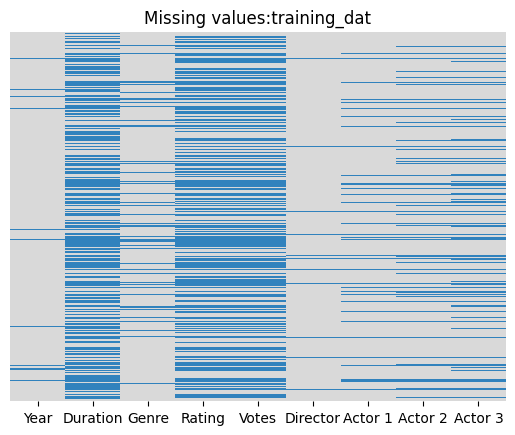

In [26]:
sns.heatmap(full_data.isnull(),yticklabels=False, cbar= False,cmap="tab20c_r")
plt.title("Missing values:training_data")
plt.show()

In [28]:

full_data.head(3)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [29]:
data = pd.get_dummies(full_data, columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Assuming 'full_dat' is your dataframe
full_data['Director'] = le.fit_transform(full_data['Director'])
full_data['Actor 1'] = le.fit_transform(full_data['Actor 1'])
full_data['Actor 2'] = le.fit_transform(full_data['Actor 2'])
full_data['Actor 3'] = le.fit_transform(full_data['Actor 3'])
full_data['Genre'] = le.fit_transform(full_data['Genre'])

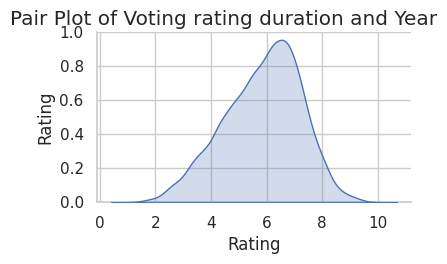

In [34]:
colums_of_interest = ['Votes','Rating','Duration','Year']
sns.set(style = "whitegrid")
sns.pairplot(full_data[colums_of_interest], diag_kind = 'kde', palette = 'husl',height=2.5,aspect = 1.6)
plt.suptitle('Pair Plot of Voting rating duration and Year',y=1.02)
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Assuming 'full_dat' is your dataframe
full_data['Director'] = le.fit_transform(full_data['Director'])
full_data['Actor 1'] = le.fit_transform(full_data['Actor 1'])
full_data['Actor 2'] = le.fit_transform(full_data['Actor 2'])
full_data['Actor 3'] = le.fit_transform(full_data['Actor 3'])
full_data['Genre'] = le.fit_transform(full_data['Genre'])
full_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,NaN,NaN,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...
15504,(1988),NaN,0,4.6,11,2690,2586,4299,4262
15505,(1999),129 min,40,4.5,655,2499,227,4532,519
15506,(2005),NaN,0,NaN,NaN,2424,3609,4891,4820
15507,(1988),NaN,0,NaN,NaN,5938,4718,4891,4820


In [36]:
data.fillna(0,inplace= True)
full_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,NaN,NaN,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...
15504,(1988),NaN,0,4.6,11,2690,2586,4299,4262
15505,(1999),129 min,40,4.5,655,2499,227,4532,519
15506,(2005),NaN,0,NaN,NaN,2424,3609,4891,4820
15507,(1988),NaN,0,NaN,NaN,5938,4718,4891,4820


In [37]:
full_data.fillna(method='ffill',inplace= True)
data.interpolate(method='linear',inplace= True)
full_data['Genre'].fillna('unknown',inplace = True)
null_counts = full_data.isnull().sum()
null_counts

,0
Year,1
Duration,1
Genre,0
Rating,1
Votes,1
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [38]:
colums_to_check = ['Votes','Rating','Duration','Year']
full_data.dropna(subset=colums_to_check,inplace=True)
full_data.isnull()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15504,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False
15506,False,False,False,False,False,False,False,False,False
15507,False,False,False,False,False,False,False,False,False


In [39]:
full_data.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [40]:
x= full_data.select_dtypes(include = 'object').columns
x

Index(['Year', 'Duration', 'Votes'], dtype='object')

In [41]:
full_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,7.0,8,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,4.4,35,385,3112,3462,405
5,(1997),147 min,197,4.7,827,3800,895,123,3829
...,...,...,...,...,...,...,...,...,...
15504,(1988),125 min,0,4.6,11,2690,2586,4299,4262
15505,(1999),129 min,40,4.5,655,2499,227,4532,519
15506,(2005),129 min,0,4.5,655,2424,3609,4891,4820
15507,(1988),129 min,0,4.5,655,5938,4718,4891,4820


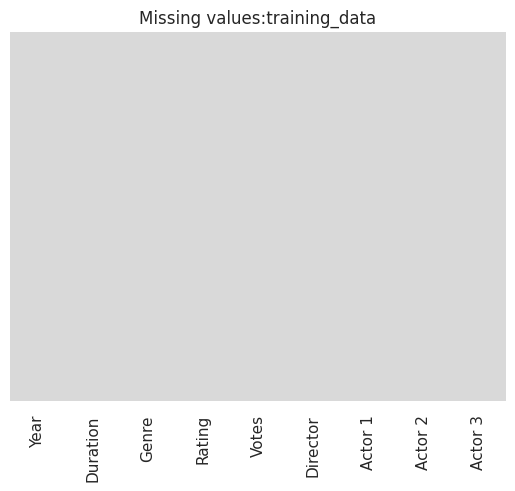

In [42]:
sns.heatmap(full_data.isnull(),yticklabels=False, cbar= False,cmap="tab20c_r")
plt.title("Missing values:training_data")
plt.show()

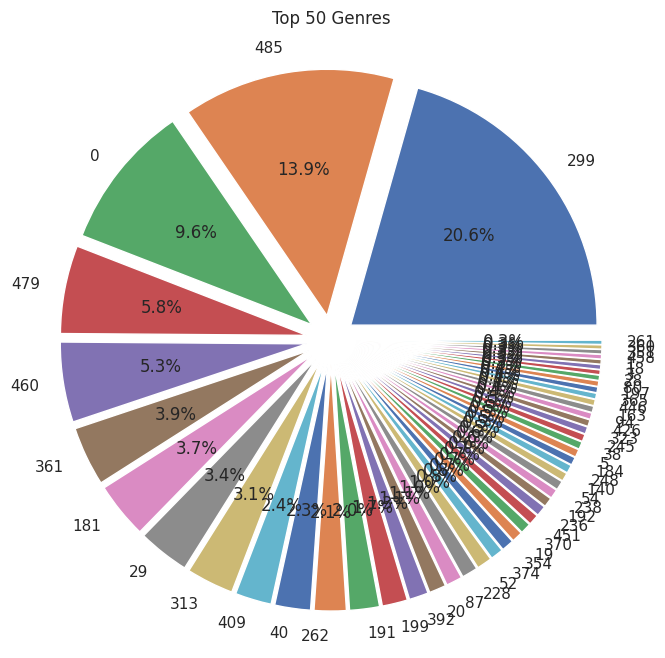

In [50]:
#Assume 'data' is your dataframe with genre column
top_50_generes = full_data['Genre'].value_counts().head(50)
plt.figure(figsize=(8,8))
#Create an 'explode' list with individual slice using a loop
explode = [0.1]*len(top_50_generes)
plt.pie(top_50_generes,labels=top_50_generes.index,autopct='%1.1f%%',explode=explode)
plt.title('Top 50 Genres')
plt.ylabel('')
plt.show()

In [45]:
full_data.shape

(15508, 9)